## Phase 1

In [12]:
# Madeline
print("Hello Iris!")

Hello Iris!


In [13]:
#Mashfika 
print("Hello Iris!")

Hello Iris!


In [14]:
# Yisihaq
print("Hello Iris!")

Hello Iris!


## Phase 2

In [15]:
# Variables of iris dataset
n_rows = 150
n_columns = 5

In [16]:
# Control structure: checking the petal length using if/else statements
petal_length = 1.4

if petal_length > 1.5:
    print("Large petal")
else:
    print("Small petal")

Small petal


In [17]:
# Iterating through a list of species using loops
species = ["Sertosa", "Versicolor", "Virginica"]
for flower in species:
    print("Species:", flower)

Species: Sertosa
Species: Versicolor
Species: Virginica


In [18]:
# Using function to return samll, medium, and large for petal and sepal length
def classify_flower(sepal_length, petal_length):
    if petal_length < 2 or sepal_length <2: 
        return "small"
    elif petal_length <5 or sepal_length < 5:
        return "medium" 
    else: 
        return "large" 
example = classify_flower(3,2)
print(example)
    

medium


## Phase 3

In [18]:
# dataset
import statistics
import pandas as pd
#Defining headers 
#df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_width', 'Species']

df = pd.read_csv("iris.data", header=None, delimiter=",")
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_width', 'Species']
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Creating a summary
header = df.columns
numeric_cols = header[:-1] # Select all of the columns except for the last one
rows = df.values.tolist() # Converting the dataframe into a list of lists


numeric_data = {col: [] for col in numeric_cols} # Dictionary comprehension to store the numeric data

for row in rows: # Goes through each row
    for i, col in enumerate(numeric_cols): # Goes through each column index and name in the column section
        try: # Try to turn it into a float
            numeric_data[col].append(float(row[i])) # If it works, it is added to the column list
        except ValueError: 
            continue # continue to the next if it does not work
            
# Creating the information to be used in our 'unclean' summary file
# Includes each column name, and the min, max and mean values for that column
summary_txt = f"Row count: {len(rows)}\n\n"
for col, values in numeric_data.items(): 
        summary_txt += ( 
            f"Column: {col}\n"
            f" Min: {min(values):.2f}\n"
            f" Max: {max(values):.2f}\n"
            f" Mean: {statistics.mean(values):.2f}\n\n"
)

# Creating a summary using the unclean data (just in case we need it)
with open('summary.txt', 'w') as f: 
    f.write(summary_txt) 
print("summary.txt created")

summary.txt created


In [20]:
# Checking for what needs to be cleaned

print("Null Values Per Column:") # Printing the null values (if any)
display(df.isnull().sum())

dupes = df[df.duplicated(keep=False)] # Finding the duplicate rows
print("\nDuplicate Rows:")
display(dupes) # Printing the duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}") # Printing the number of duplicated rows

Null Values Per Column:


Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_width     0
Species         0
dtype: int64


Duplicate Rows:


,Sepal_Length,Sepal_Width,Petal_Length,Petal_width,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica



Number of duplicate rows: 3


In [21]:
# Cleaning dataset
df.dropna(how='all', inplace=True) # Drap rows where all values are missing 

df.drop_duplicates(inplace=True) # Remove any duplicate rows

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') # Converts 'numeric_cols' to numeric types 

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean()) # Fill any missing values with the column's mean

df.to_csv('iris_cleaned.csv', index=False) # Saved the cleaned DataFrame to a new CSV file
print("iris_cleaned.csv saved!")

iris_cleaned.csv saved!


In [22]:
# Creating the cleaned data summary
summary_clean = f"Row count: {len(df)}\n\n"

# Creating the information to be used in our 'clean' summary file
# Includes each column name, and the min, max and mean values for that column
for col in numeric_cols: 
    summary_clean += (
        f"Column: {col}\n"
        f"  Min: {df[col].min():.2f}\n"
        f"  Max: {df[col].max():.2f}\n"
        f"  Mean: {df[col].mean():.2f}\n"
) 

# Creating the new file
with open('clean_summary.txt', 'w') as f:
    f.write(summary_clean)

# Verifying that the file was created without any errors
print("clean_summary.txt created")

clean_summary.txt created


## Phase 4

In Phase 4, we: 
- analyze the Iris dataset
- categorize flowers based on petal length
- computer summary statistics
- create group-based summaries
- visualize the data with histograms, bar charts, boxplots, and scatter plots

This helps us understand which features are most useful for distinguishing species.

In [23]:
import matplotlib.pyplot as plt

# Loading in the cleaned dataset
df = pd.read_csv("iris_cleaned.csv")

# Display the first few rows to make sure it loaded in correctly
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Get the unique species
species_list = df['Species'].unique()

# Initialize a counter list for each species
counts = [0] * len(species_list)

# Loop through each flower and accumulate the correct species list
for s in df['Species']:
    for i, species in enumerate(species_list):
        if s == species:
            counts[i] += 1

# Print the counts for each species
for species, count in zip(species_list, counts):
    print(f"{species}: {count}")

Iris-setosa: 48
Iris-versicolor: 50
Iris-virginica: 49


In [25]:
# Define a function to categorize petal length
def categorize_petal_length(length):
    if length < 2:
        return "Short Petal"
    elif 2 <= length <= 5:
        return "Medium Petal"
    else:
        return "Long Petal"

# Apply the function to create a new column
df['Petal_Category'] = df['Petal_Length'].apply(categorize_petal_length)

# Display petal lengths alongside their categorization
df[['Petal_Length', 'Petal_Category']]

,Petal_Length,Petal_Category
0,1.4,Short Petal
1,1.4,Short Petal
2,1.3,Short Petal
3,1.5,Short Petal
4,1.4,Short Petal
...,...,...
142,5.2,Long Petal
143,5.0,Medium Petal
144,5.2,Long Petal
145,5.4,Long Petal


In [28]:
#compute summary statistics 
stats = df[numeric_cols].agg(['mean','median', 'min', 'max'])
stats

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
mean,5.856463,3.055782,3.780272,1.208844
median,5.800000,3.000000,4.400000,1.300000
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
# compute average sepal and petal measurements for each species using group stats
group_stats = df.groupby('Species')[numeric_cols].mean()
group_stats

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
Species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


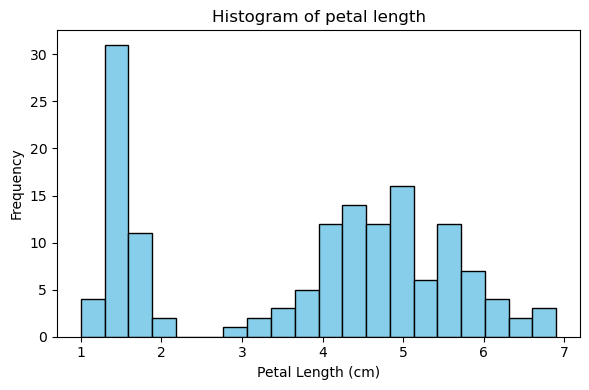

In [34]:
#Histogram petal lengths
plt.figure(figsize = (6,4))
plt.hist(df['Petal_Length'], bins=20, color='skyblue',edgecolor='black')
plt.title("Histogram of petal length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Petal_Histogram.png", dpi=300, bbox_inches='tight')
plt.show()

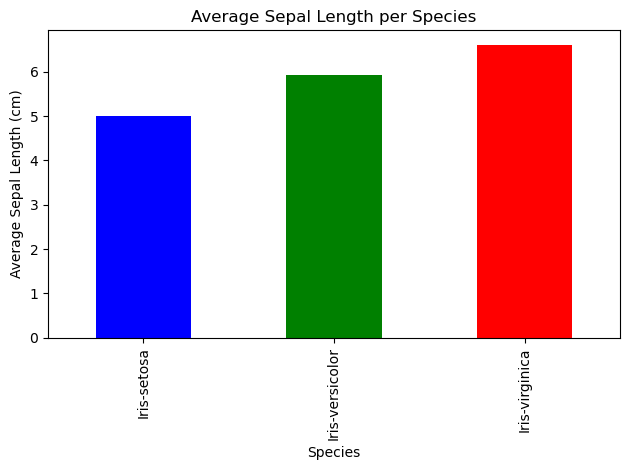

In [36]:
#Bar chart for average sepal length by species 
avg_sepal = df.groupby('Species')['Sepal_Length'].mean()
avg_sepal.plot(kind= 'bar', color=['blue', 'green', 'red'])
plt.title("Average Sepal Length per Species") 
plt.ylabel("Average Sepal Length (cm)")
plt.xlabel("Species")
plt.tight_layout()
plt.savefig("Average_Sepal_length_Barchart.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 600x400 with 0 Axes>

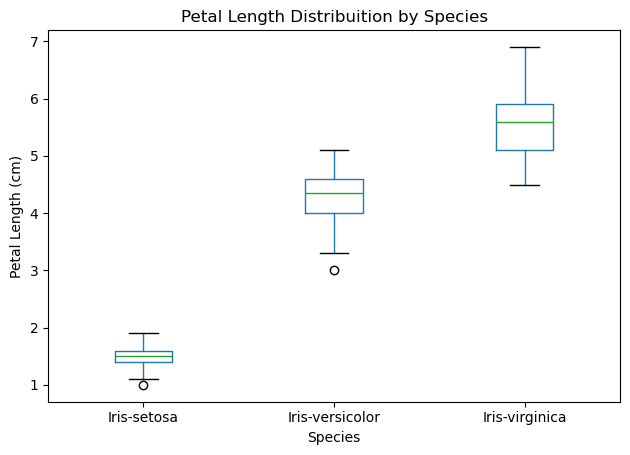

In [38]:
#Boxplot of Petal Length by Species 
plt.figure(figsize=(6,4))
df.boxplot(column= 'Petal_Length', by='Species', grid=False)
plt.title("Petal Length Distribuition by Species")
plt.suptitle("")#remove automatic title from pandas 
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.savefig("Petal_Length_Boxplot.png", dpi=300, bbox_inches='tight')
plt.show()